In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,geometry
0,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,"POLYGON ((424043.145 4505847.017, 424036.495 4..."
1,15086,2,Neighborhood Center,1473,44.089344,52165.559080,12.890390,"POLYGON ((424421.505 4505865.604, 424414.855 4..."
2,15086,2,Neighborhood Center,1481,68.022708,13056.790069,3.226403,"POLYGON ((424229.000 4505722.832, 424209.282 4..."
3,15086,2,Neighborhood Center,1482,39.922698,11968.229688,2.957414,"POLYGON ((424396.265 4505812.237, 424384.505 4..."
4,15183,1,Neighborhood Center,176,288.616036,35706.046305,8.823156,"POLYGON ((412496.126 4566424.387, 412502.776 4..."
...,...,...,...,...,...,...,...,...
176,23506,2,Urban Center,1383,82.068433,10615.218005,2.623077,"POLYGON ((418812.341 4505510.828, 418778.475 4..."
177,15069,2,Urban Center,1384,96.889876,96050.643097,23.734631,"POLYGON ((419155.967 4505527.709, 419191.659 4..."
178,15069,2,Urban Center,1384,96.889876,112145.604931,27.711783,"POLYGON ((419396.604 4505077.508, 419387.011 4..."
179,23506,2,Urban Center,1384,96.889876,34533.423293,8.533395,"POLYGON ((419457.973 4505447.709, 419448.379 4..."


<AxesSubplot:>

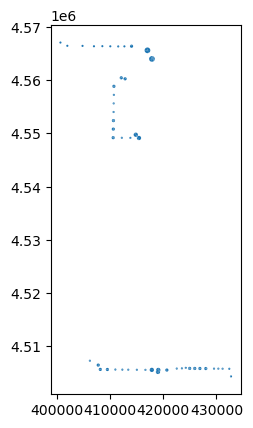

In [2]:
gdf_buffered_stops_with_centers_taz = gpd.read_file('intermediate/buffered-stops-with-centers-taz.geojson')
display(gdf_buffered_stops_with_centers_taz)
gdf_buffered_stops_with_centers_taz.plot()

In [3]:
taz_list = gdf_buffered_stops_with_centers_taz['TAZID'].drop_duplicates()
taz_list

0      1472
1      1473
2      1481
3      1482
4       176
       ... 
170    1367
172    1368
174    1383
177    1384
180    1396
Name: TAZID, Length: 156, dtype: int64

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4..."
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4..."
2,0,3.0,0.0,867.0,0.0,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((421778.186 4524869.076, 421778.184 4..."
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4..."
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4..."
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4..."
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4..."
712234,0,766664.0,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423121.651 4483703.060, 423133.545 4..."


<AxesSubplot:>

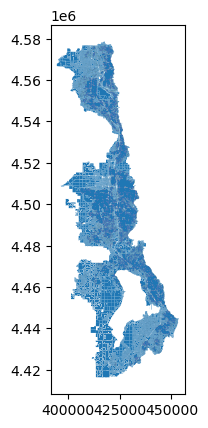

In [4]:
gdf_future_land_use_2050 = gpd.read_file("input/from-josh/future_land_use_2023_2050/future_land_use_2050.shp")
display(gdf_future_land_use_2050)
gdf_future_land_use_2050.plot()

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,office,govt,mixed,other,year,no_build,geometry
0,0,1.0,0.0,832.0,13.0,2.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((425865.890 4526947.611, 425871.954 4..."
1,0,2.0,0.0,704.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((417720.678 4548575.705, 417693.594 4..."
2,0,3.0,0.0,867.0,0.0,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((421778.186 4524869.076, 421778.184 4..."
3,0,4.0,0.0,862.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2019.0,0.0,"POLYGON ((421713.800 4525534.079, 421713.699 4..."
4,0,5.0,0.0,825.0,8.1,1.6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424969.129 4527569.085, 424968.316 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712231,0,766662.0,0.0,2149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423350.575 4482843.542, 424338.645 4..."
712232,0,766665.0,0.0,2153.0,16.2,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2023.0,0.0,"POLYGON ((424469.352 4482399.505, 424469.232 4..."
712233,0,766663.0,0.0,2141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((424402.497 4482832.180, 424338.645 4..."
712234,0,766664.0,0.0,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0,"POLYGON ((423121.651 4483703.060, 423133.545 4..."


<AxesSubplot:>

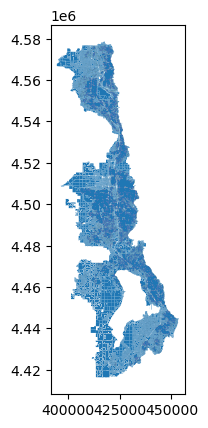

In [5]:
gdf_future_land_use_2023 = gpd.read_file("input/from-josh/future_land_use_2023_2050/future_land_use_2023.shp")
display(gdf_future_land_use_2023)
gdf_future_land_use_2023.plot()

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,...,no_build,geometry,sqmf,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,HH,EMP
29,0,30.0,0.0,703.0,16.2,2.500,0.0,1.0,1.0,1.0,...,0.0,"POLYGON ((417012.157 4548237.802, 417011.358 4...",2167.504299,0.535602,changeable,0.000000,0.000000,0.535602,True,True
30,0,31.0,0.0,663.0,5.7,1.900,0.0,1.0,1.0,1.0,...,0.0,"POLYGON ((412384.278 4549313.040, 412383.678 4...",8228.779810,2.033376,changeable,0.000000,0.000000,2.033376,True,True
56,0,57.0,0.0,671.0,25.0,0.500,1.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410591.738 4550764.407, 410590.905 4...",5518.016320,1.363532,changeable,0.000000,0.000000,1.363532,True,True
66,0,68.0,0.0,660.0,16.2,2.200,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((415566.472 4549797.697, 415565.647 4...",5836.925178,1.442336,changeable,0.000000,0.000000,1.442336,True,True
181,0,183.0,0.0,664.0,0.0,0.000,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((415432.582 4549340.593, 415469.303 4...",2282.018560,0.563899,no_build,0.563899,0.000000,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708397,0,762198.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,...,0.0,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677,no_change,0.000000,0.451677,0.000000,True,False
708398,0,762199.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,1.0,...,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,changeable,0.000000,0.000000,0.080572,True,True
708399,0,762200.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,...,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,no_change,0.000000,0.080572,0.000000,True,False
708414,0,762215.0,0.0,185.0,2.0,0.425,1.0,0.0,0.0,0.0,...,0.0,"POLYGON ((411244.002 4565574.527, 411248.229 4...",19.889829,0.004915,no_change,0.000000,0.004915,0.000000,True,False


<AxesSubplot:>

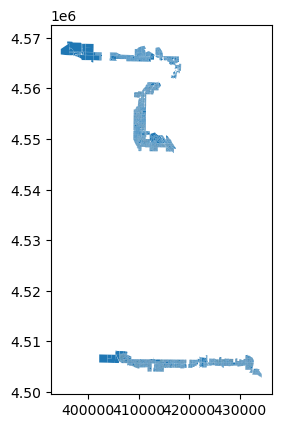

In [247]:
gdf_future_land_use_2050_filtered = gdf_future_land_use_2050[gdf_future_land_use_2050['TAZID_900'].isin(taz_list)].copy()

# Calculate the area in square meters
gdf_future_land_use_2050_filtered['sqmf'] = gdf_future_land_use_2050_filtered.geometry.area

gdf_future_land_use_2050_filtered['acresf'] = gdf_future_land_use_2050_filtered['sqmf'] / 4046.85642

# Define the conditions
condition_HH = (gdf_future_land_use_2050_filtered['sf'] + gdf_future_land_use_2050_filtered['mf']) >= 1
condition_EMP = gdf_future_land_use_2050_filtered[['ind', 'retail', 'office', 'govt', 'mixed', 'other']].sum(axis=1) > 0

# Define the condition for no build
condition_no_build = (gdf_future_land_use_2050_filtered['no_build'] == 1)
# Define the condition - SF =1 and others =0
condition_no_change = _config.get_condition_no_change(gdf_future_land_use_2050_filtered)

# Calculate the area and assign it to the new column
gdf_future_land_use_2050_filtered['dev_status'] = np.where(
    condition_no_build, 'no_build', 
    np.where(condition_no_change, 'no_change', 'changeable')
)

gdf_future_land_use_2050_filtered['acresf_nb'] = np.where(condition_no_build                        , gdf_future_land_use_2050_filtered['acresf'], 0)
gdf_future_land_use_2050_filtered['acresf_nc'] = np.where(condition_no_change                       , gdf_future_land_use_2050_filtered['acresf'], 0)
gdf_future_land_use_2050_filtered['acresf_ch'] = np.where(~condition_no_build & ~condition_no_change, gdf_future_land_use_2050_filtered['acresf'], 0)

# Check if condition is met and assign boolean values
gdf_future_land_use_2050_filtered['HH'] = condition_HH
gdf_future_land_use_2050_filtered['EMP'] = condition_EMP

display(gdf_future_land_use_2050_filtered)
gdf_future_land_use_2050_filtered.plot()

In [248]:
gdf_future_land_use_2050_filtered[gdf_future_land_use_2050_filtered['TAZID_900']==669]

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,...,no_build,geometry,sqmf,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,HH,EMP
263,0,265.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((410637.004 4551111.898, 410637.006 4...",3419.631141,0.845009,no_build,0.845009,0.0,0.000000,False,False
1040,0,1110.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411175.861 4551152.430, 411227.534 4...",197401.166753,48.778891,no_build,48.778891,0.0,0.000000,False,False
1041,0,1111.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411783.075 4550803.440, 411782.948 4...",1807.005649,0.446521,no_build,0.446521,0.0,0.000000,False,False
1042,0,1112.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411783.075 4550803.440, 411782.948 4...",6535.061685,1.614849,no_build,1.614849,0.0,0.000000,False,False
1043,0,1113.0,0.0,669.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,"POLYGON ((411675.232 4551551.256, 411676.068 4...",66151.557288,16.346406,no_build,16.346406,0.0,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659366,0,712981.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410904.248 4551556.253, 410995.848 4...",22006.152418,5.437839,changeable,0.000000,0.0,5.437839,True,True
659367,0,712982.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410995.848 4551315.483, 410995.848 4...",22006.140414,5.437836,changeable,0.000000,0.0,5.437836,True,True
659368,0,712983.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((410995.848 4551435.391, 410995.848 4...",22006.148334,5.437838,changeable,0.000000,0.0,5.437838,True,True
660304,0,713925.0,0.0,669.0,16.2,1.8,0.0,1.0,0.0,1.0,...,0.0,"POLYGON ((411175.861 4551152.430, 411180.607 4...",37915.237559,9.369059,changeable,0.000000,0.0,9.369059,True,True


# Calculate Percent Changeable

,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,ind,retail,...,other,year,no_build,geometry,sqmf,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch
29,0,30.0,0.0,703.0,16.2,2.500,0.0,1.0,1.0,1.0,...,0.0,2023.0,0.0,"POLYGON ((417012.157 4548237.802, 417011.358 4...",2167.504299,0.535602,changeable,0.000000,0.000000,0.535602
30,0,31.0,0.0,663.0,5.7,1.900,0.0,1.0,1.0,1.0,...,0.0,2023.0,0.0,"POLYGON ((412384.278 4549313.040, 412383.678 4...",8228.779810,2.033376,changeable,0.000000,0.000000,2.033376
56,0,57.0,0.0,671.0,25.0,0.500,1.0,1.0,0.0,1.0,...,0.0,2019.0,0.0,"POLYGON ((410591.738 4550764.407, 410590.905 4...",5518.016320,1.363532,changeable,0.000000,0.000000,1.363532
66,0,68.0,0.0,660.0,16.2,2.200,0.0,1.0,0.0,1.0,...,0.0,2023.0,0.0,"POLYGON ((415566.472 4549797.697, 415565.647 4...",5836.925178,1.442336,changeable,0.000000,0.000000,1.442336
181,0,183.0,0.0,664.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,2019.0,1.0,"POLYGON ((415432.582 4549340.593, 415469.303 4...",2282.018560,0.563899,no_build,0.563899,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708397,0,762198.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,...,0.0,2019.0,0.0,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677,no_change,0.000000,0.451677,0.000000
708398,0,762199.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,1.0,...,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,changeable,0.000000,0.000000,0.080572
708399,0,762200.0,0.0,522.0,5.2,0.425,1.0,0.0,0.0,0.0,...,0.0,2019.0,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,no_change,0.000000,0.080572,0.000000
708414,0,762215.0,0.0,185.0,2.0,0.425,1.0,0.0,0.0,0.0,...,0.0,2019.0,0.0,"POLYGON ((411244.002 4565574.527, 411248.229 4...",19.889829,0.004915,no_change,0.000000,0.004915,0.000000


<AxesSubplot:>

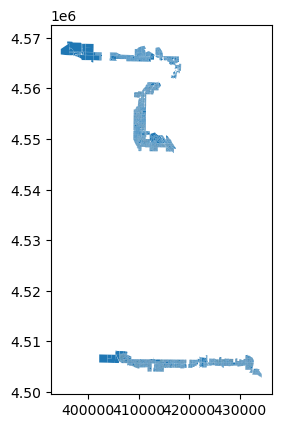

In [249]:
gdf_future_land_use_2023_filtered = gdf_future_land_use_2023[gdf_future_land_use_2023['TAZID_900'].isin(taz_list)].copy()

# Calculate the area in square meters
gdf_future_land_use_2023_filtered['sqmf'] = gdf_future_land_use_2023_filtered.geometry.area

gdf_future_land_use_2023_filtered['acresf'] = gdf_future_land_use_2023_filtered['sqmf'] / 4046.85642

# Define the condition for no build
condition_no_build = (gdf_future_land_use_2023_filtered['no_build'] == 1)
# Define the condition - SF =1 and others =0
condition_no_change = _config.get_condition_no_change(gdf_future_land_use_2023_filtered)

# Calculate the area and assign it to the new column
gdf_future_land_use_2023_filtered['dev_status'] = np.where(
    condition_no_build, 'no_build', 
    np.where(condition_no_change, 'no_change', 'changeable')
)

gdf_future_land_use_2023_filtered['acresf_nb'] = np.where(condition_no_build                        , gdf_future_land_use_2023_filtered['acresf'], 0)
gdf_future_land_use_2023_filtered['acresf_nc'] = np.where(condition_no_change                       , gdf_future_land_use_2023_filtered['acresf'], 0)
gdf_future_land_use_2023_filtered['acresf_ch'] = np.where(~condition_no_build & ~condition_no_change, gdf_future_land_use_2023_filtered['acresf'], 0)

display(gdf_future_land_use_2023_filtered)
gdf_future_land_use_2023_filtered.plot()

C:\Users\bhereth\AppData\Local\Temp\ipykernel_20868\383959537.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 52 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_stops_flu_23 = gpd.overlay(gdf_buffered_stops_with_centers_taz, gdf_future_land_use_2023_filtered, how='union')


,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,Id,parcel_id,parcel_acr,...,dev_status,acresf_nb,acresf_nc,acresf_ch,geometry,sqmu,acresu,acresu_nb,acresu_nc,acresu_ch
0,15086,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,32026.0,0.0,...,no_build,0.702799,0.000000,0.000000,"POLYGON ((424219.151 4506000.418, 424219.130 4...",2844.126515,0.702799,0.702799,0.000000,0.000000
1,15086,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,32027.0,0.0,...,no_build,0.074421,0.000000,0.000000,"POLYGON ((424178.815 4505985.650, 424178.872 4...",301.172154,0.074421,0.074421,0.000000,0.000000
2,15086,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,32028.0,0.0,...,no_build,0.649559,0.000000,0.000000,"POLYGON ((424218.274 4505919.830, 424178.057 4...",2628.671202,0.649559,0.649559,0.000000,0.000000
3,15086,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,32029.0,0.0,...,no_build,0.363022,0.000000,0.000000,"POLYGON ((424217.774 4505883.133, 424177.562 4...",1469.098009,0.363022,0.363022,0.000000,0.000000
4,15086,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,35468.0,0.0,...,no_build,0.409873,0.000000,0.000000,"POLYGON ((424217.236 4505843.873, 424217.222 4...",1658.698816,0.409873,0.409873,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48315,0,NaN,NaN,522.0,NaN,NaN,NaN,0.0,762198.0,0.0,...,no_change,0.000000,0.451677,0.000000,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677,0.000000,0.451677,0.000000
48316,0,NaN,NaN,522.0,NaN,NaN,NaN,0.0,762199.0,0.0,...,changeable,0.000000,0.000000,0.080572,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,0.000000,0.000000,0.080572
48317,0,NaN,NaN,522.0,NaN,NaN,NaN,0.0,762200.0,0.0,...,no_change,0.000000,0.080572,0.000000,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,0.000000,0.080572,0.000000
48318,0,NaN,NaN,185.0,NaN,NaN,NaN,0.0,762215.0,0.0,...,no_change,0.000000,0.004915,0.000000,"POLYGON ((411244.002 4565574.527, 411248.229 4...",19.889829,0.004915,0.000000,0.004915,0.000000


<AxesSubplot:>

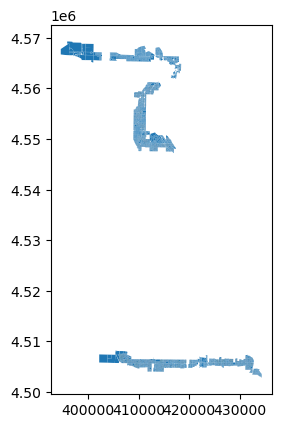

In [250]:
# Perform the intersection of the first two GeoDataFrames
gdf_stops_flu_23 = gpd.overlay(gdf_buffered_stops_with_centers_taz, gdf_future_land_use_2023_filtered, how='union')

# drop non-parcel areas from union
gdf_stops_flu_23 = gdf_stops_flu_23.dropna(subset=['parcel_id'])

# Calculate the area in square meters
gdf_stops_flu_23['sqmu'] = gdf_stops_flu_23.geometry.area

# Convert the area to acres
gdf_stops_flu_23['acresu'] = gdf_stops_flu_23['sqmu'] / 4046.85642


# Define the condition for no build
condition_no_build = (gdf_stops_flu_23['no_build'] == 1)
# Define the condition - SF =1 and others =0
condition_no_change = _config.get_condition_no_change(gdf_stops_flu_23)

# Calculate the area and assign it to the new column
gdf_stops_flu_23['dev_status'] = np.where(
    condition_no_build, 'no_build', 
    np.where(condition_no_change, 'no_change', 'changeable')
)

gdf_stops_flu_23['acresu_nb'] = np.where(condition_no_build                        , gdf_stops_flu_23['acresu'], 0)
gdf_stops_flu_23['acresu_nc'] = np.where(condition_no_change                       , gdf_stops_flu_23['acresu'], 0)
gdf_stops_flu_23['acresu_ch'] = np.where(~condition_no_build & ~condition_no_change, gdf_stops_flu_23['acresu'], 0)


# fill null TAZID with value from FLU
gdf_stops_flu_23['TAZID'].fillna(gdf_stops_flu_23['TAZID_900'], inplace=True)

gdf_stops_flu_23['N'].fillna(0, inplace=True)
gdf_stops_flu_23['N'] = gdf_stops_flu_23['N'].astype(int)

# The final_intersection GeoDataFrame now contains the intersection of all three GeoDataFrames
display(gdf_stops_flu_23)
gdf_stops_flu_23.plot()

In [251]:
import numpy as np

gdf_stops_flu_23_sum_acres = gdf_stops_flu_23.groupby(['N','project_id','TAZID'], as_index=False).agg(acresu     = ('acresu'   ,'sum'),
                                                                                                      acresu_nb  = ('acresu_nb','sum'),
                                                                                                      acresu_nc  = ('acresu_nc','sum'),
                                                                                                      acresu_ch  = ('acresu_ch','sum'))

gdf_stops_flu_23_sum_acres['pctu_nb'] = gdf_stops_flu_23_sum_acres['acresu_nb'] / gdf_stops_flu_23_sum_acres['acresu']
gdf_stops_flu_23_sum_acres['pctu_nc'] = gdf_stops_flu_23_sum_acres['acresu_nc'] / gdf_stops_flu_23_sum_acres['acresu']
gdf_stops_flu_23_sum_acres['pctu_ch'] = gdf_stops_flu_23_sum_acres['acresu_ch'] / gdf_stops_flu_23_sum_acres['acresu']

gdf_stops_flu_23_sum_acres['pctu_nb'].fillna(0, inplace=True)
gdf_stops_flu_23_sum_acres['pctu_nc'].fillna(0, inplace=True)
gdf_stops_flu_23_sum_acres['pctu_ch'].fillna(0, inplace=True)

gdf_stops_flu_23_sum_acres

,N,project_id,TAZID,acresu,acresu_nb,acresu_nc,acresu_ch,pctu_nb,pctu_nc,pctu_ch
0,10036,3.0,657.0,1.886942,0.000000,0.154724,1.732218,0.000000,0.081997,0.918003
1,10036,3.0,658.0,3.697462,0.645534,0.339257,2.712670,0.174589,0.091754,0.733657
2,10036,3.0,663.0,53.907930,0.000000,0.463194,53.444735,0.000000,0.008592,0.991408
3,10036,3.0,664.0,47.584234,37.902355,0.440350,9.241529,0.796532,0.009254,0.194214
4,10042,3.0,497.0,5.772935,0.061059,5.711876,0.000000,0.010577,0.989423,0.000000
...,...,...,...,...,...,...,...,...,...,...
167,27931,3.0,508.0,12.593264,0.148307,11.759782,0.685174,0.011777,0.933815,0.054408
168,28117,3.0,468.0,19.796697,8.456992,0.000000,11.339705,0.427192,0.000000,0.572808
169,28117,3.0,473.0,7.167374,0.028367,0.000000,7.139006,0.003958,0.000000,0.996042
170,28117,3.0,497.0,8.465698,0.510379,1.255075,6.700244,0.060288,0.148254,0.791458


In [252]:
gdf_stops_flu_23_sum_acres[gdf_stops_flu_23_sum_acres['N']==27479]

,N,project_id,TAZID,acresu,acresu_nb,acresu_nc,acresu_ch,pctu_nb,pctu_nc,pctu_ch
146,27479,3.0,663.0,2.605862,0.00000,0.000000,2.605862,0.000000,0.000000,1.000000
147,27479,3.0,664.0,50.254611,2.92495,0.000000,47.329661,0.058203,0.000000,0.941797
148,27479,3.0,666.0,11.372229,0.00000,11.372229,0.000000,0.000000,1.000000,0.000000
149,27479,3.0,702.0,31.095668,0.00000,23.277235,7.818433,0.000000,0.748568,0.251432


In [254]:
gdf_stops_flu_23[gdf_stops_flu_23['dev_status']=='no_change']

,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,Id,parcel_id,parcel_acr,...,dev_status,acresf_nb,acresf_nc,acresf_ch,geometry,sqmu,acresu,acresu_nb,acresu_nc,acresu_ch
71,15183,1.0,Neighborhood Center,176.0,288.616036,35706.046305,8.823156,0.0,24241.0,0.0,...,no_change,0.0,63.620633,0.0,"POLYGON ((412502.776 4566442.975, 412511.217 4...",33585.533706,8.299166,0.0,8.299166,0.0
72,15184,1.0,Neighborhood Center,176.0,288.616036,28705.713474,7.093336,0.0,24213.0,0.0,...,no_change,0.0,3.542359,0.0,"POLYGON ((411487.766 4566551.440, 411507.294 4...",3587.445457,0.886477,0.0,0.886477,0.0
73,15184,1.0,Neighborhood Center,176.0,288.616036,28705.713474,7.093336,0.0,717110.0,0.0,...,no_change,0.0,8.217054,0.0,"POLYGON ((411566.257 4566551.440, 411585.408 4...",18534.138671,4.579885,0.0,4.579885,0.0
74,15184,1.0,Neighborhood Center,176.0,288.616036,28705.713474,7.093336,0.0,717111.0,0.0,...,no_change,0.0,5.652256,0.0,"POLYGON ((411669.259 4566496.385, 411682.516 4...",2910.874480,0.719293,0.0,0.719293,0.0
76,15184,1.0,Neighborhood Center,173.0,505.276482,10718.549706,2.648611,0.0,24209.0,0.0,...,no_change,0.0,6.047423,0.0,"POLYGON ((411349.598 4566448.968, 411359.747 4...",5597.690290,1.383219,0.0,1.383219,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48314,0,NaN,NaN,522.0,NaN,NaN,NaN,0.0,762197.0,0.0,...,no_change,0.0,0.451677,0.0,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677,0.0,0.451677,0.0
48315,0,NaN,NaN,522.0,NaN,NaN,NaN,0.0,762198.0,0.0,...,no_change,0.0,0.451677,0.0,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677,0.0,0.451677,0.0
48317,0,NaN,NaN,522.0,NaN,NaN,NaN,0.0,762200.0,0.0,...,no_change,0.0,0.080572,0.0,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572,0.0,0.080572,0.0
48318,0,NaN,NaN,185.0,NaN,NaN,NaN,0.0,762215.0,0.0,...,no_change,0.0,0.004915,0.0,"POLYGON ((411244.002 4565574.527, 411248.229 4...",19.889829,0.004915,0.0,0.004915,0.0


In [255]:
dfTemp = pd.DataFrame(gdf_stops_flu_23[gdf_stops_flu_23['TAZID']==702])
dfTemp

,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,Id,parcel_id,parcel_acr,...,dev_status,acresf_nb,acresf_nc,acresf_ch,geometry,sqmu,acresu,acresu_nb,acresu_nc,acresu_ch
3880,27479,3.0,Urban Center,702.0,330.569711,171252.081197,42.317311,0.0,1967.0,0.0,...,changeable,0.0,0.000000,0.595046,"POLYGON ((415831.398 4549099.564, 415827.616 4...",1107.277403,0.273614,0.0,0.000000,0.273614
3881,27479,3.0,Urban Center,702.0,330.569711,171252.081197,42.317311,0.0,3937.0,0.0,...,changeable,0.0,0.000000,7.544819,"POLYGON ((415235.714 4549123.053, 415250.753 4...",30532.797868,7.544819,0.0,0.000000,7.544819
3882,27479,3.0,Urban Center,702.0,330.569711,171252.081197,42.317311,0.0,110175.0,0.0,...,no_change,0.0,0.226195,0.000000,"POLYGON ((415742.009 4548883.761, 415740.390 4...",733.843343,0.181337,0.0,0.181337,0.000000
3883,27479,3.0,Urban Center,702.0,330.569711,171252.081197,42.317311,0.0,110176.0,0.0,...,no_change,0.0,0.184937,0.000000,"POLYGON ((415725.785 4548865.861, 415706.313 4...",537.029884,0.132703,0.0,0.132703,0.000000
3884,27479,3.0,Urban Center,702.0,330.569711,171252.081197,42.317311,0.0,110177.0,0.0,...,no_change,0.0,0.213489,0.000000,"POLYGON ((415715.494 4548854.506, 415707.775 4...",499.343096,0.123390,0.0,0.123390,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11101,0,NaN,NaN,702.0,NaN,NaN,NaN,0.0,112840.0,0.0,...,no_change,0.0,0.292102,0.000000,"POLYGON ((416867.979 4547816.056, 416868.165 4...",1182.096230,0.292102,0.0,0.292102,0.000000
46273,0,NaN,NaN,702.0,NaN,NaN,NaN,0.0,448494.0,0.0,...,no_change,0.0,0.256502,0.000000,"POLYGON ((416368.270 4548361.446, 416399.525 4...",1038.025068,0.256502,0.0,0.256502,0.000000
46274,0,NaN,NaN,702.0,NaN,NaN,NaN,0.0,448495.0,0.0,...,no_change,0.0,0.307384,0.000000,"POLYGON ((416384.607 4548348.203, 416416.126 4...",1243.939225,0.307384,0.0,0.307384,0.000000
46275,0,NaN,NaN,702.0,NaN,NaN,NaN,0.0,448496.0,0.0,...,no_change,0.0,0.515255,0.000000,"POLYGON ((416399.525 4548399.213, 416368.270 4...",2085.162607,0.515255,0.0,0.515255,0.000000


In [256]:
gdf_stops_flu_23_sum_acres[['N','project_id','TAZID','pctu_ch']].to_csv('intermediate/percent-changeable.csv', index=False)
print('Exported!')

Exported!


# Calcuate portion of TAZ HH and EMP

C:\Users\bhereth\AppData\Local\Temp\ipykernel_20868\243798586.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 52 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf_stops_flu_50 = gpd.overlay(gdf_buffered_stops_with_centers_taz, gdf_future_land_use_2050_filtered, how='union')


,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,Id,parcel_id,parcel_acr,...,acresf,dev_status,acresf_nb,acresf_nc,acresf_ch,HH,EMP,geometry,sqmu,acresu
0,15086.0,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,32026.0,0.0,...,0.702799,no_build,0.702799,0.000000,0.000000,False,False,"POLYGON ((424219.151 4506000.418, 424219.130 4...",2844.126515,0.702799
1,15086.0,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,32027.0,0.0,...,0.074421,no_build,0.074421,0.000000,0.000000,False,False,"POLYGON ((424178.815 4505985.650, 424178.872 4...",301.172154,0.074421
2,15086.0,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,32028.0,0.0,...,0.649559,no_build,0.649559,0.000000,0.000000,False,False,"POLYGON ((424218.274 4505919.830, 424178.057 4...",2628.671202,0.649559
3,15086.0,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,32029.0,0.0,...,0.363022,no_build,0.363022,0.000000,0.000000,False,False,"POLYGON ((424217.774 4505883.133, 424177.562 4...",1469.098009,0.363022
4,15086.0,2.0,Neighborhood Center,1472.0,42.036264,49740.404222,12.291122,0.0,35468.0,0.0,...,0.409873,no_build,0.409873,0.000000,0.000000,False,False,"POLYGON ((424217.236 4505843.873, 424217.222 4...",1658.698816,0.409873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48315,-1.0,-1.0,NaN,522.0,NaN,NaN,NaN,0.0,762198.0,0.0,...,0.451677,no_change,0.000000,0.451677,0.000000,True,False,"POLYGON ((411480.449 4556243.440, 411480.298 4...",1827.872840,0.451677
48316,-1.0,-1.0,NaN,522.0,NaN,NaN,NaN,0.0,762199.0,0.0,...,0.080572,changeable,0.000000,0.000000,0.080572,True,True,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572
48317,-1.0,-1.0,NaN,522.0,NaN,NaN,NaN,0.0,762200.0,0.0,...,0.080572,no_change,0.000000,0.080572,0.000000,True,False,"POLYGON ((411088.775 4556248.637, 411088.767 4...",326.062873,0.080572
48318,-1.0,-1.0,NaN,185.0,NaN,NaN,NaN,0.0,762215.0,0.0,...,0.004915,no_change,0.000000,0.004915,0.000000,True,False,"POLYGON ((411244.002 4565574.527, 411248.229 4...",19.889829,0.004915


<AxesSubplot:>

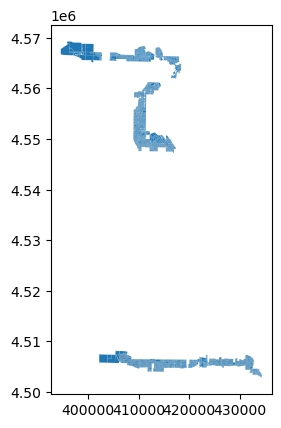

In [257]:
# Perform the intersection of the first two GeoDataFrames
gdf_stops_flu_50 = gpd.overlay(gdf_buffered_stops_with_centers_taz, gdf_future_land_use_2050_filtered, how='union')

# Calculate the area in square meters
gdf_stops_flu_50['sqmu'] = gdf_stops_flu_50.geometry.area

# Convert the area to acres
gdf_stops_flu_50['acresu'] = gdf_stops_flu_50['sqmu'] / 4046.85642

# fill null TAZID with value from FLU
gdf_stops_flu_50['TAZID'].fillna(gdf_stops_flu_50['TAZID_900'], inplace=True)

gdf_stops_flu_50[['N', 'project_id']] = gdf_stops_flu_50[['N', 'project_id']].fillna(-1)

# The final_intersection GeoDataFrame now contains the intersection of all three GeoDataFrames
display(gdf_stops_flu_50)
gdf_stops_flu_50.plot()

<AxesSubplot:>

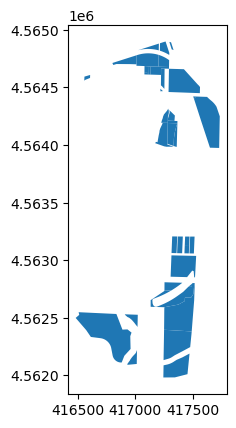

In [258]:
gdf_stops_flu_50[(gdf_stops_flu_50['TAZID'].isin([367,388])) & (gdf_stops_flu_50['EMP']==True)].plot()

<AxesSubplot:>

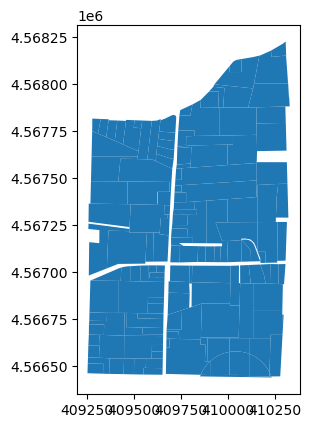

In [259]:
gdf_stops_flu_50[gdf_stops_flu_50['TAZID']==172].plot()

<AxesSubplot:>

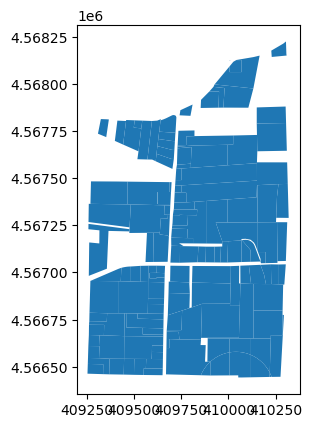

In [260]:
gdf_stops_flu_50[(gdf_stops_flu_50['TAZID']==172) & (gdf_stops_flu_50['HH']==True)].plot()

In [261]:
# Step 1: Calculate the total sum of acresu for each TAZID
total_acresu_by_tazid = gdf_stops_flu_50[gdf_stops_flu_50['HH'] == True].groupby('TAZID', as_index=False).agg(total_acresu=('acresu', 'sum'))

df_stops_flu_50_HH_areas = gdf_stops_flu_50.copy()

df_stops_flu_50_HH_areas['variable'] = 'TOTHH'

# Step 2: Group by TAZID, N, and project_id and calculate the sum of acresu for HH==True
df_stops_flu_50_HH_areas = df_stops_flu_50_HH_areas[df_stops_flu_50_HH_areas['HH'] == True].groupby(['TAZID', 'N', 'project_id', 'variable'], as_index=False).agg(acresu_sum=('acresu', 'sum'))

# Step 3: Merge the total sum back to the grouped DataFrame
df_stops_flu_50_HH_areas = df_stops_flu_50_HH_areas.merge(total_acresu_by_tazid, on='TAZID', how='left')

# Step 4: Perform the division
df_stops_flu_50_HH_areas['ratio_of_taz'] = df_stops_flu_50_HH_areas['acresu_sum'] / df_stops_flu_50_HH_areas['total_acresu']

# Display the resulting DataFrame
df_stops_flu_50_HH_areas

,TAZID,N,project_id,variable,acresu_sum,total_acresu,ratio_of_taz
0,165.0,-1.0,-1.0,TOTHH,40.138821,40.138821,1.000000
1,172.0,-1.0,-1.0,TOTHH,301.574843,310.305654,0.971864
2,172.0,15185.0,1.0,TOTHH,8.730811,310.305654,0.028136
3,173.0,-1.0,-1.0,TOTHH,465.295229,466.744455,0.996895
4,173.0,15184.0,1.0,TOTHH,1.449226,466.744455,0.003105
...,...,...,...,...,...,...,...
289,1530.0,25381.0,2.0,TOTHH,0.041383,175.127083,0.000236
290,1531.0,-1.0,-1.0,TOTHH,330.401002,339.140487,0.974230
291,1531.0,25381.0,2.0,TOTHH,8.739485,339.140487,0.025770
292,1679.0,-1.0,-1.0,TOTHH,53.335290,53.360360,0.999530


In [262]:
# Step 1: Calculate the total sum of area_acresu for each TAZID
total_acres_flu_by_tazid_50_emp = gdf_stops_flu_50[gdf_stops_flu_50['EMP'] == True].groupby('TAZID', as_index=False).agg(total_acresu=('acresu', 'sum'))

df_stops_flu_50_EMP_areas = gdf_stops_flu_50.copy()

df_stops_flu_50_EMP_areas['variable'] = 'TOTEMP'

# Step 2: Group by TAZID, N, and project_id and calculate the sum of acresu for EMP==True
df_stops_flu_50_EMP_areas = df_stops_flu_50_EMP_areas[df_stops_flu_50_EMP_areas['EMP'] == True].groupby(['TAZID', 'N', 'project_id', 'variable'], as_index=False).agg(acresu_sum=('acresu', 'sum'))

# Step 3: Merge the total sum back to the grouped DataFrame
df_stops_flu_50_EMP_areas = df_stops_flu_50_EMP_areas.merge(total_acres_flu_by_tazid_50_emp, on='TAZID', how='left')

# Step 4: Perform the division
df_stops_flu_50_EMP_areas['ratio_of_taz'] = df_stops_flu_50_EMP_areas['acresu_sum'] / df_stops_flu_50_EMP_areas['total_acresu']

# Display the resulting DataFrame
df_stops_flu_50_EMP_areas

,TAZID,N,project_id,variable,acresu_sum,total_acresu,ratio_of_taz
0,165.0,-1.0,-1.0,TOTEMP,3370.473916,3399.126447,0.991571
1,165.0,15191.0,1.0,TOTEMP,28.652530,3399.126447,0.008429
2,176.0,-1.0,-1.0,TOTEMP,71.107227,79.406393,0.895485
3,176.0,15183.0,1.0,TOTEMP,8.299166,79.406393,0.104515
4,177.0,-1.0,-1.0,TOTEMP,347.028241,373.290579,0.929646
...,...,...,...,...,...,...,...
281,1520.0,25351.0,2.0,TOTEMP,0.945633,5.289500,0.178776
282,1521.0,-1.0,-1.0,TOTEMP,5.477001,6.891638,0.794731
283,1521.0,25351.0,2.0,TOTEMP,1.414637,6.891638,0.205269
284,1531.0,-1.0,-1.0,TOTEMP,12.760038,21.205152,0.601742


In [263]:
df_stops_flu_50_areas = pd.concat([df_stops_flu_50_HH_areas, df_stops_flu_50_EMP_areas])
df_stops_flu_50_areas = df_stops_flu_50_areas[['TAZID','N','project_id','variable','ratio_of_taz']]
df_stops_flu_50_areas

,TAZID,N,project_id,variable,ratio_of_taz
0,165.0,-1.0,-1.0,TOTHH,1.000000
1,172.0,-1.0,-1.0,TOTHH,0.971864
2,172.0,15185.0,1.0,TOTHH,0.028136
3,173.0,-1.0,-1.0,TOTHH,0.996895
4,173.0,15184.0,1.0,TOTHH,0.003105
...,...,...,...,...,...
281,1520.0,25351.0,2.0,TOTEMP,0.178776
282,1521.0,-1.0,-1.0,TOTEMP,0.794731
283,1521.0,25351.0,2.0,TOTEMP,0.205269
284,1531.0,-1.0,-1.0,TOTEMP,0.601742


In [264]:
df_stops_flu_50_areas

,TAZID,N,project_id,variable,ratio_of_taz
0,165.0,-1.0,-1.0,TOTHH,1.000000
1,172.0,-1.0,-1.0,TOTHH,0.971864
2,172.0,15185.0,1.0,TOTHH,0.028136
3,173.0,-1.0,-1.0,TOTHH,0.996895
4,173.0,15184.0,1.0,TOTHH,0.003105
...,...,...,...,...,...
281,1520.0,25351.0,2.0,TOTEMP,0.178776
282,1521.0,-1.0,-1.0,TOTEMP,0.794731
283,1521.0,25351.0,2.0,TOTEMP,0.205269
284,1531.0,-1.0,-1.0,TOTEMP,0.601742


In [265]:
df_stops_flu_50_areas[df_stops_flu_50_areas['TAZID']==165]

,TAZID,N,project_id,variable,ratio_of_taz
0,165.0,-1.0,-1.0,TOTHH,1.000000
0,165.0,-1.0,-1.0,TOTEMP,0.991571
1,165.0,15191.0,1.0,TOTEMP,0.008429


In [266]:
df_stops_flu_50_areas_pivot = df_stops_flu_50_areas.pivot(index=['TAZID','N','project_id'], columns='variable', values='ratio_of_taz')
df_stops_flu_50_areas_pivot.reset_index(inplace=True)
df_stops_flu_50_areas_pivot.fillna(0,inplace=True)
df_stops_flu_50_areas_pivot.to_csv('intermediate/parameter-area-ratio-of-taz.csv', index=False)
print('Exported!')

Exported!


In [267]:
import geopandas as gpd

# Dissolve based on 'dev_status' attribute
dissolved_2023 = gdf_future_land_use_2023_filtered.dissolve(by=['dev_status'])

# Dissolve based on 'dev_status', 'HH', and 'EMP' attributes
#dissolved_2050 = gdf_future_land_use_2050_filtered.dissolve(by=['dev_status', 'HH', 'EMP'])

# Explode MultiPolygons into individual Polygons
dissolved_2023 = dissolved_2023.explode(index_parts=True)
#dissolved_2050 = dissolved_2050.explode(index_parts=True)

# Reset index to clean up the GeoDataFrame
dissolved_2023 = dissolved_2023.reset_index()
#dissolved_2050 = dissolved_2050.reset_index()

# Project to WGS 84 (EPSG:4326)
dissolved_2023 = dissolved_2023.to_crs(epsg=4326)
#dissolved_2050 = dissolved_2050.to_crs(epsg=4326)

# Export to GeoJSON
dissolved_2023[['dev_status', 'geometry']].to_file('_site/data/future_land_use_2023_filtered.geojson', driver='GeoJSON')
#dissolved_2050[['dev_status', 'HH', 'EMP', 'geometry']].to_file('_site/data/future_land_use_2050_filtered.geojson', driver='GeoJSON')


In [268]:
dissolved_2023[dissolved_2023['dev_status']=='no_change']

,dev_status,level_1,Id,parcel_id,parcel_acr,TAZID_900,max_dua,max_far,sf,mf,...,mixed,other,year,no_build,sqmf,acresf,acresf_nb,acresf_nc,acresf_ch,geometry
1653,no_change,0,0,306.0,0.0,604.0,2.9,0.5,1.0,0.0,...,0.0,0.0,2019.0,0.0,27379.495916,6.765621,0.0,6.765621,0.0,"POLYGON ((-112.10650 40.69752, -112.10650 40.6..."
1654,no_change,1,0,306.0,0.0,604.0,2.9,0.5,1.0,0.0,...,0.0,0.0,2019.0,0.0,27379.495916,6.765621,0.0,6.765621,0.0,"POLYGON ((-112.10619 40.69774, -112.10619 40.6..."
1655,no_change,2,0,306.0,0.0,604.0,2.9,0.5,1.0,0.0,...,0.0,0.0,2019.0,0.0,27379.495916,6.765621,0.0,6.765621,0.0,"POLYGON ((-112.10715 40.69848, -112.10734 40.6..."
1656,no_change,3,0,306.0,0.0,604.0,2.9,0.5,1.0,0.0,...,0.0,0.0,2019.0,0.0,27379.495916,6.765621,0.0,6.765621,0.0,"POLYGON ((-112.10989 40.69946, -112.10991 40.6..."
1657,no_change,4,0,306.0,0.0,604.0,2.9,0.5,1.0,0.0,...,0.0,0.0,2019.0,0.0,27379.495916,6.765621,0.0,6.765621,0.0,"POLYGON ((-112.10640 40.69873, -112.10641 40.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,no_change,1949,0,306.0,0.0,604.0,2.9,0.5,1.0,0.0,...,0.0,0.0,2019.0,0.0,27379.495916,6.765621,0.0,6.765621,0.0,"POLYGON ((-111.79171 40.68404, -111.79171 40.6..."
3603,no_change,1950,0,306.0,0.0,604.0,2.9,0.5,1.0,0.0,...,0.0,0.0,2019.0,0.0,27379.495916,6.765621,0.0,6.765621,0.0,"POLYGON ((-111.78953 40.68429, -111.78954 40.6..."
3604,no_change,1951,0,306.0,0.0,604.0,2.9,0.5,1.0,0.0,...,0.0,0.0,2019.0,0.0,27379.495916,6.765621,0.0,6.765621,0.0,"POLYGON ((-111.78982 40.68553, -111.78983 40.6..."
3605,no_change,1952,0,306.0,0.0,604.0,2.9,0.5,1.0,0.0,...,0.0,0.0,2019.0,0.0,27379.495916,6.765621,0.0,6.765621,0.0,"POLYGON ((-111.78487 40.68661, -111.78487 40.6..."
